In [1]:
# This script serves as the basis for training Attention U-Net
# But in our case we carried out the training on Google COLAB
# If you need to carry out training, you must make the necessary changes.

import config
import torch
import sys
sys.path.append('../util')
sys.path.append('../others_networks')
import time
from Trainer import Trainer
from util import measure_inference_speed, count_trainable_parameters
from DatasetReader import *

from MiniAttenUNet import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
result_path = './AttenUNets/'

In [2]:
dataset_path        = "/mnt/TUDAO/0Datasets/fuseg/augmented-v3-512/"
dataset_resolution  = 512
out_channels        = 1
in_channels         = 3
batch_size          = 16

train_loader, test_loader, val_loader = get_datasets(dataset_dir=dataset_path, 
                                              resolution=dataset_resolution, 
                                              batch_size=batch_size)

torch.Size([16, 3, 512, 512]) torch.Size([16, 1, 512, 512])


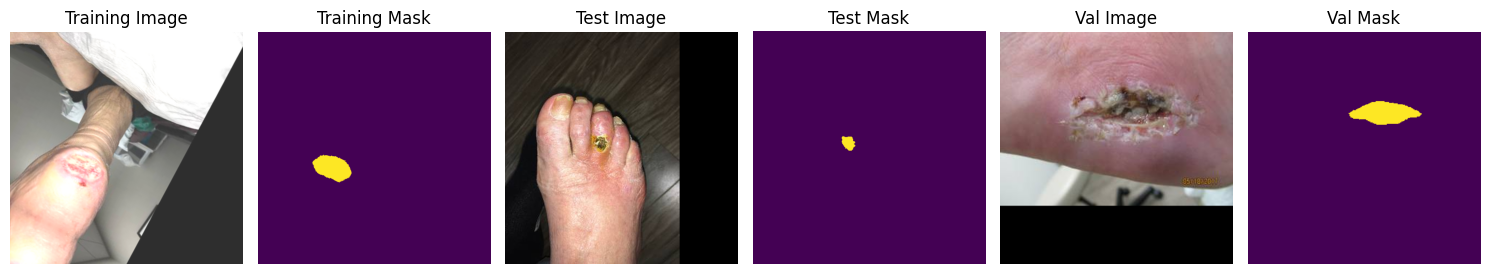

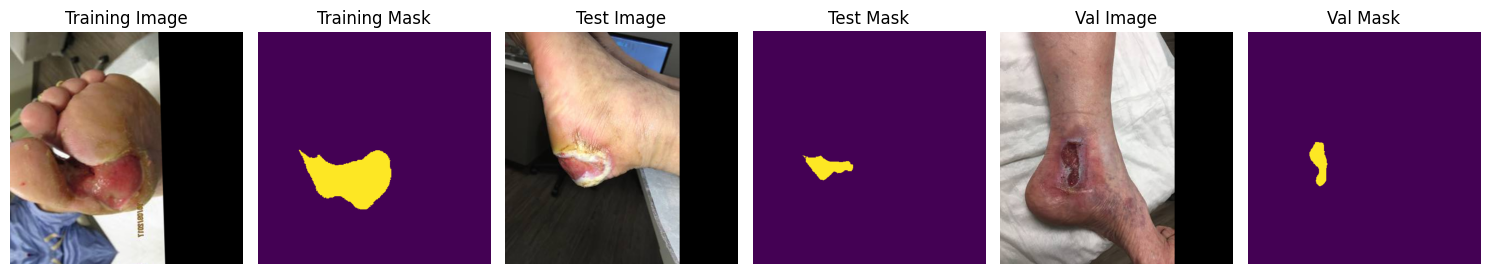

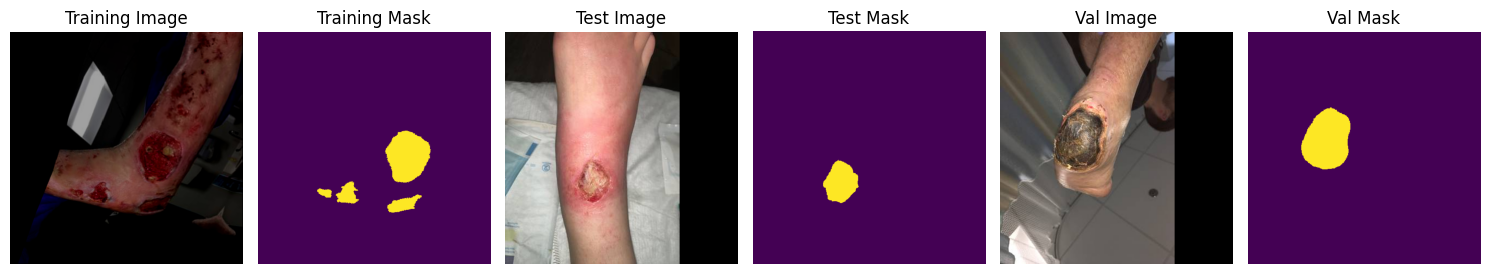

In [3]:
for (images_train, masks_train), (images_test, masks_test) in zip(train_loader, test_loader):
    print(images_train.shape, masks_train.shape)
    break

show_dataset_prev(train_loader, test_loader, val_loader, num_images=3)

In [4]:
def train(model, model_name):
    epochs = 300
    model_filename = f'{model_name}-epochs{epochs}.pth'
    trainer = Trainer(model_filename=model_filename,
                    model_dir=result_path, 
                    info={'weights':'DEFAULT'},
                    save_xlsx=True)
    model = trainer.train(model, train_loader, val_loader, test_loader,
                            num_epochs=epochs, 
                            save_every=1, 
                            continue_from_last=True,
                            learning_rate=1e-3,
                            verbose=1)
    model.to(device)


## Baseline Attention U-Net

In [ ]:
# Attention U-Net baseline (input 512x512)
model = MiniAttU_Net_5Layers(img_ch=in_channels, output_ch=out_channels)
model = train(model, model_name='MiniAttU_Net_5Layers-FuSeg-res512-input512')

## 384x384 Attention U-Net

In [6]:
img_res      = 384
dataset_name = f'augmented-v3-512_patches{img_res}'
dataset_path = f'/mnt/TUDAO/0Datasets/fuseg/{dataset_name}/'

train_loader, test_loader, val_loader = get_datasets(dataset_dir=dataset_path, 
                                              resolution=dataset_resolution, 
                                              batch_size=batch_size)

In [ ]:
model = MiniAttU_Net_5Layers(img_ch=in_channels, output_ch=out_channels)
model = train(model, model_name=f'MiniAttU_Net_5Layers-FuSeg-res512-input{img_res}')

## 256x256 Attention U-Net

In [ ]:
img_res      = 256
dataset_name = f'augmented-v3-512_patches{img_res}'
dataset_path = f'/mnt/TUDAO/0Datasets/fuseg/{dataset_name}/'

train_loader, test_loader, val_loader = get_datasets(dataset_dir=dataset_path, 
                                              resolution=dataset_resolution, 
                                              batch_size=batch_size)

In [ ]:
model = MiniAttU_Net_5Layers(img_ch=in_channels, output_ch=out_channels)
model = train(model, model_name=f'MiniAttU_Net_5Layers-FuSeg-res512-input{img_res}')

## 128x128 Attention U-Net

In [ ]:
img_res      = 128
dataset_name = f'augmented-v3-512_patches{img_res}'
dataset_path = f'/mnt/TUDAO/0Datasets/fuseg/{dataset_name}/'

train_loader, test_loader, val_loader = get_datasets(dataset_dir=dataset_path, 
                                              resolution=dataset_resolution, 
                                              batch_size=batch_size)

In [ ]:
model = MiniAttU_Net_4Layers(img_ch=in_channels, output_ch=out_channels)
model = train(model, model_name=f'MiniAttU_Net_4Layers-FuSeg-res512-input{img_res}')

## 64x64 Attention U-Net

In [ ]:
img_res      = 64
dataset_name = f'augmented-v3-512_patches{img_res}'
dataset_path = f'/mnt/TUDAO/0Datasets/fuseg/{dataset_name}/'

train_loader, test_loader, val_loader = get_datasets(dataset_dir=dataset_path, 
                                              resolution=dataset_resolution, 
                                              batch_size=batch_size)

In [ ]:
model = MiniAttU_Net_3Layers(img_ch=in_channels, output_ch=out_channels)
model = train(model, model_name=f'MiniAttU_Net_3Layers-FuSeg-res512-input{img_res}')

## 48x48 Attention U-Net

In [8]:
img_res      = 48
dataset_name = f'augmented-v3-512_patches{img_res}'
dataset_path = f'/mnt/TUDAO/0Datasets/fuseg/{dataset_name}/'

train_loader, test_loader, val_loader = get_datasets(dataset_dir=dataset_path, 
                                              resolution=dataset_resolution, 
                                              batch_size=batch_size)

In [ ]:
model = MiniAttU_Net_3Layers(img_ch=in_channels, output_ch=out_channels)
model = train(model, model_name=f'MiniAttU_Net_3Layers-FuSeg-res512-input{img_res}')